<a href="https://colab.research.google.com/github/Samar2411/Python_Paper_Airplanes/blob/main/Week_7_Variances_and_Data_Visualization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
from google.colab import files 

In [ ]:
cars = pd.DataFrame()
cars['Toyota'] = array1 
cars['KIA'] = array2
cars['Ford'] = array3

In [ ]:
cars
Cars

,speed
0,"[149.00899544901458, 149.8391459063808, 148.95..."
1,"[129.22912043965997, 130.60576178429935, 130.3..."
2,"[141.16163374837032, 139.026148499838, 139.809..."


In [ ]:
cars.to_excel('Cars.xlsx')
files.download('Cars.xlsx')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# ANOVA


ANOVA stands for Analysis of Variance and it can be used to compared more than two groups/samples in statistics.

The null hypothesis is that all the groups are equal. If there is a pvalue lower than .05, at least one of the groups is different than another one. 

The conditions to conduct an ANOVA are 
1. Normally Distributed Data 
2. Independent Samples

One important consideration is whether the variance is equal or unequal between the samples. 

Without getting too much into how variance is calcualted, there is a test called bartletts's test that allows you to check if youre samples have equal variance. 

Lets say for example that we have 3 car companies. All of them claim their cars are the fastest. We cannot drive all of them so we must take a sample. We test drive 200 cars from each 


In [ ]:
from scipy.stats import shapiro

In [ ]:
from scipy.stats import bartlett

In [ ]:
uploaded = files.upload()

Saving Cars .csv to Cars .csv


In [ ]:
cars = pd.read_csv('Cars .csv')

In [ ]:
cars

,Toyota,KIA,Ford
0,149.008995,129.229120,141.161634
1,149.839146,130.605762,139.026149
2,148.952551,130.359002,139.809250
3,150.972079,131.205757,140.068181
4,149.674316,128.843755,139.794471
...,...,...,...
195,149.535863,128.307480,140.180270
196,149.548645,129.449314,142.089545
197,149.226530,130.716423,140.972305
198,150.592555,128.689364,140.874163


# Checking for equal variances

We will learn to visualize data later and look at variances but you can also use the bartlett test to check if their variances are equal. If the p value is greater than .05, we say that the variances are equal. 

In [ ]:
bartlett(cars['Toyota'], cars['KIA'], cars['Ford'])

BartlettResult(statistic=0.02710623932514517, pvalue=0.9865383103436908)

The syntax for the ANOVA test itself is quite simple. Inside the stats.f_oneway() you just need to place series representing each of the samples. 

In [ ]:
stats.f_oneway(cars['Toyota'], cars['KIA'], cars['Ford'])

F_onewayResult(statistic=19126.568543854937, pvalue=0.0)

#Posthoc Tukey Test

If we want to know which groups are different from each other, we need to use a test called a Posthoc Tukey Test. The output is messy so we want to save it onto a variable well call Tukey and call it so we can observe the test results.

Our first argument is our data, then our groups. 

Unfortunately, the tukey test requires that our data be organized such that the name of each car company is on the same row as the data. The first code cell is dedicated to doing that. 

In [ ]:
array1 = np.random.normal(150, 1, 200)
array2 = np.random.normal(130, 1, 200)
array3 = np.random.normal(140, 1, 200)
array1 = np.append(array1, array2)
array1 = np.append(array1, array3)
company = ['Toyota'] * 200 + ['KIA']*200 + ['Ford']*200
Master_DF = pd.DataFrame()
Master_DF['speed'] = array1
Master_DF['company'] = company
Master_DF

,speed,company
0,147.266690,Toyota
1,150.615816,Toyota
2,150.454802,Toyota
3,150.163796,Toyota
4,151.070310,Toyota
...,...,...
595,140.992569,Ford
596,142.340925,Ford
597,139.481858,Ford
598,139.451843,Ford


Once the data has been organized correctly, the syntax is quite simple. The data or speeds in this case is the first arguement. The groups or in this case, the company names are the second argument.

The result is a table of pairwise comparisons and shows the p value for each comparison. 

In [ ]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd
result = pairwise_tukeyhsd(Master_DF['speed'], Master_DF['company'])
print(result)

Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj  lower    upper  reject
----------------------------------------------------
  Ford    KIA  -9.8557 0.001 -10.0825 -9.6289   True
  Ford Toyota   9.9164 0.001   9.6896 10.1432   True
   KIA Toyota  19.7721 0.001  19.5453 19.9989   True
----------------------------------------------------


#Skewed Data

So far, we have treated data that has a normal distribution. But in reality, sometimes data is skewed or not distributed about the mean. If that is the case, that we cannot use the methods we have discussed so far and rather, we need to apply a different set of statistical tests. Generally speaking, the tests for skewed data test if the medians, not the means, are different. 

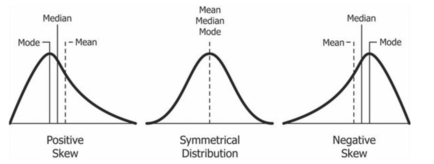

#Two Unpaired Skewed Distributions: Mann-Whitney U Test

When we want to compare two different samples wheere the data is small and clearly skewed, we can use the Mann-Whitney U Test. In this case, the samples should be considered independent. 

One such example is if you have two patient groups in a drug trial. One group is given a sugar pill and the other is given painkiller and are asked to report the number of migraines they get per day for five days after. 

The data is given in the following dataframe. Are they statistically significant?

In [ ]:
drug_trial = pd.DataFrame()
drug_trial['Sugar_Pill'] = [7,5,6,4,12]
drug_trial['Pain_Killer'] = [3,6,4,2,1]
drug_trial

,Sugar_Pill,Pain_Killer
0,7,3
1,5,6
2,6,4
3,4,2
4,12,1


(array([1., 1., 1., 1., 0., 0., 0., 0., 0., 1.]),
 array([ 4. ,  4.8,  5.6,  6.4,  7.2,  8. ,  8.8,  9.6, 10.4, 11.2, 12. ]),
 <a list of 10 Patch objects>)

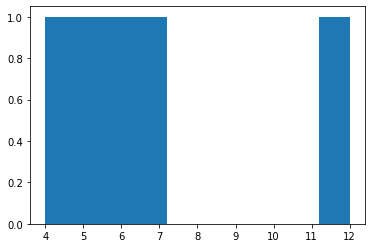

In [ ]:
plt.hist(drug_trial['Sugar_Pill'])

(array([1., 0., 1., 0., 1., 0., 1., 0., 0., 1.]),
 array([1. , 1.5, 2. , 2.5, 3. , 3.5, 4. , 4.5, 5. , 5.5, 6. ]),
 <a list of 10 Patch objects>)

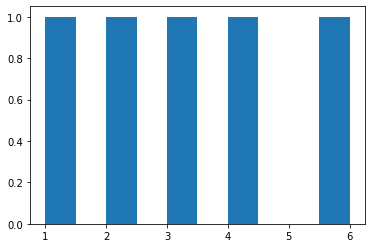

In [ ]:
plt.hist(drug_trial['Pain_Killer'])

In [ ]:
from scipy.stats import mannwhitneyu

In [ ]:
mannwhitneyu(drug_trial['Sugar_Pill'], drug_trial['Pain_Killer'])

MannwhitneyuResult(statistic=22.0, pvalue=0.05855263015682658)

#Paired Skewed Data Distributions: Wilcoxon Matched Pairs Signed-Rank

I may sound like a broken record but another common use of paired statistics is clinical trials. For clinical trails where the number of patients might be small. 

In this case, instead of looking at two seperate groups, we are looking at one group before and after treatment. Lets look at a set of patients before and after heart medication. We have paired samples since this is the same sample before and after. We also have skewed distribution. 

For this test, we need to also subtract the before and after. 

In [ ]:
heart = pd.DataFrame()
heart['patient'] = ['Patient1', 'Patient2', 'Patient3', 'Patient4', 'Patient5', 'Patient6', 'Patient7', 'Patient8']
heart['Before'] = [85, 70, 40, 65, 80, 75, 55, 20]
heart['After'] = [75, 50, 50, 40, 20, 65, 40, 25]
heart['Minus'] = heart['Before']  - heart['After']
heart

,patient,Before,After,Minus
0,Patient1,85,75,10
1,Patient2,70,50,20
2,Patient3,40,50,-10
3,Patient4,65,40,25
4,Patient5,80,20,60
5,Patient6,75,65,10
6,Patient7,55,40,15
7,Patient8,20,25,-5


Once we have a set of differences between all the datasets, we can just run wilcoxon on the series of data containing ot

In [ ]:
from scipy.stats import wilcoxon
wilcoxon(heart['Minus'])

WilcoxonResult(statistic=4.0, pvalue=0.0546875)

#More than two Skewed Data Distributions: non parametric ANOVA

If we are dealing with more than 2 samples, we need ot use a non-parametric ANOVA (sometimes called a Kruskal-Wallis Test).

Lets say we are testing three types of protein powder and want to observe blood protein levels after consumption. Are they different?



In [ ]:
protein1 = [3.1, 2.6, 2.9]
protein2 = [3.8, 4.1, 2.9, 3.4, 4.2]
protein3 = [4, 5.5, 5, 4.8]

In [ ]:
stats.kruskal(protein1, protein2, protein3)

KruskalResult(statistic=7.549473684210525, pvalue=0.02294312751270393)

Data Visualization:

One of the most important aspects of data science is data visualization!

The two libraries we will need for data visualization is 
  A. Matplotlib
  B. Seaborn

I personally prefer Matplotlib so I will be following mostly with matplotlib.

In [ ]:
import matplotlib.pyplot as plt


#Subplot 

The first thing we have to do is to set up our "space"

We do this with the subplots command. You can determine the number of rows and columns. 

(<Figure size 432x288 with 2 Axes>,
 array([<matplotlib.axes._subplots.AxesSubplot object at 0x7feb2b166b50>,
       dtype=object))

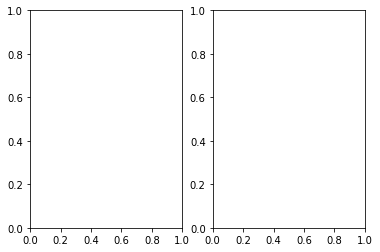

In [ ]:
plt.subplots(1,2)

#Add Axes


You can also insert axes.

Text(0.5, 0, 'x-axis')

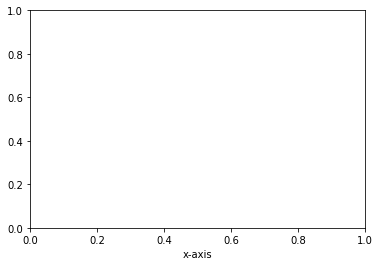

In [ ]:
plt.xlabel('x-axis')


Text(0, 0.5, 'y-axis')

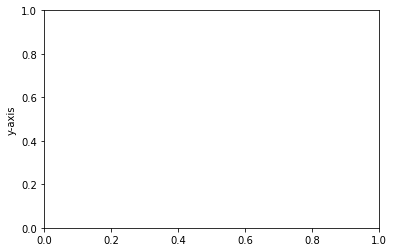

In [ ]:
plt.ylabel('y-axis')

#Add Title



Text(0.5, 1.0, 'Figure Title')

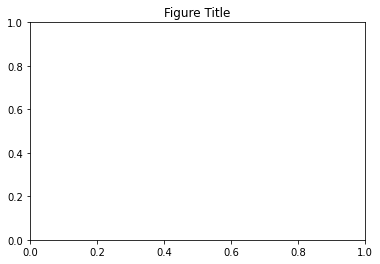

In [ ]:
plt.title('Figure Title')

#Scale

# We can set the x axis size and y axis size.

(0.0, 10.0)

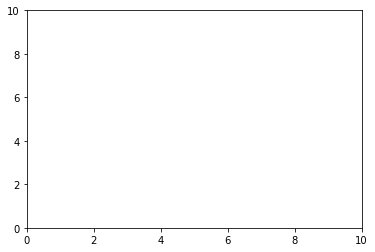

In [ ]:
plt.xlim(0,10)
plt.ylim(0,10)

We are going to go through some basic ways to plot data in python.
Some Basic Plots include

A. Bar Charts
B. Scatterplots
C. Line Plot

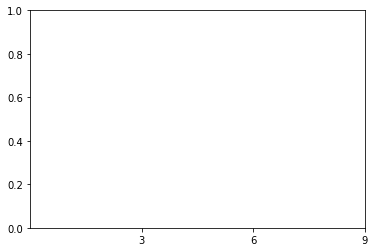

In [ ]:
fig, ax = plt.subplots()
x_ticks = [3,6,9]
y_ticks = [3,6,9]
ax.set_xticks(x_ticks)

# Bar Chart
A Bar chart has two elements, an x axis and a y axis. 

On the x axis are different groups of data. On the y axis is where you plot you data.

In [ ]:
bar1 = np.random.normal(50, 1, 200)
bar2 = np.random.normal(60, 1, 200)
bar3 = np.random.normal(70, 1, 200)

names = ['bar1', 'bar2', 'bar3']
data = [50, 60, 70]

<BarContainer object of 3 artists>

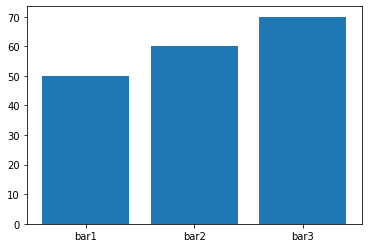

In [ ]:
plt.bar(names, data)


# We can draw a line plot.

A line plot is a depiction of the relationship between two different variables.

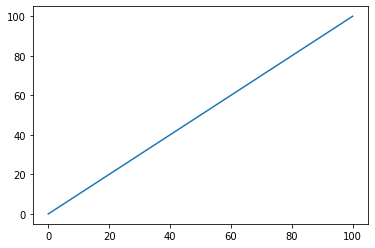

In [ ]:
data_x = np.linspace(0,100, 10)
data_y = np.linspace(0,100,10)
plt.plot(data_x, data_y)

#Scatter Plot

A Scatterplot is similar to a line graph but it does not attempt to show the relationship between two varibales.

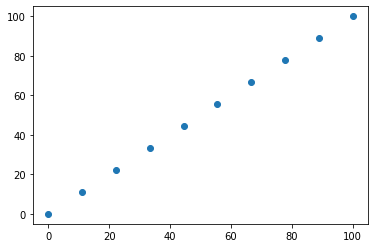

In [ ]:
data_x = np.linspace(0,100, 10)
data_y = np.linspace(0,100,10)
plt.scatter(data_x, data_y)


#Drawing Lines in Figures

axhline = horizontal line
axvline = vertical line
grid creates a grid pattern on your figure

Text(0.5, 1.0, 'Scatter')

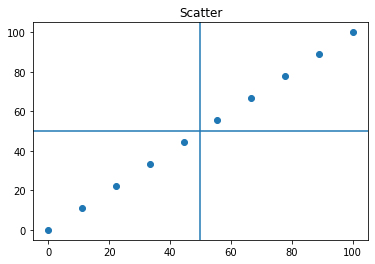

In [ ]:

data_x = np.linspace(0,100, 10)
data_y = np.linspace(0,100,10)
plt.scatter(data_x, data_y)
plt.axhline(y=50)
plt.axvline(x=50)
plt.title('Scatter')



Text(0.5, 1.0, 'Scatter')

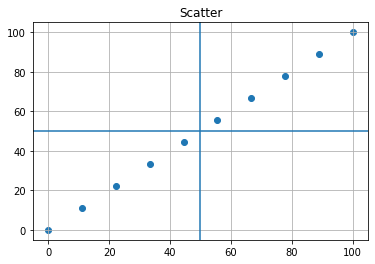

In [ ]:
plt.grid('True')
data_x = np.linspace(0,100, 10)
data_y = np.linspace(0,100,10)
plt.scatter(data_x, data_y)
plt.axhline(y=50)
plt.axvline(x=50)
plt.title('Scatter')

#Saving a Figure

Sometimes you find that you visualize your data exactly the way you want to and want to export it for use in a presentation or report. Google Collab allows you to save your figures with the following command.

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

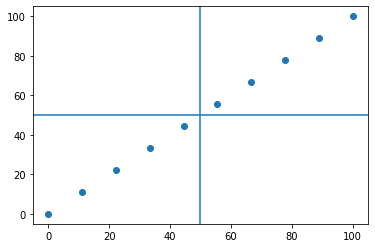

In [ ]:
data_x = np.linspace(0,100, 10)
data_y = np.linspace(0,100,10)
plt.scatter(data_x, data_y)
plt.axhline(y=50)
plt.axvline(x=50)
plt.savefig('Scatter.jpeg')
files.download('Scatter.jpeg')

Some More Advanced Plots Include 

A. Boxplot
B. Violinplot
C. Histogram
D. Volcano Plots

#Boxplot

In many ways, a boxplot is a more detailed version of a bar chart. 

A boxplot shows the the minimum, first quartile, median, third quartile, and maximum of a set of data.

In [ ]:
box1 = np.random.normal(150, 1, 200)
box2 = np.random.normal(130, 1, 200)
box3 = np.random.normal(140, 1, 200)

{'whiskers': [<matplotlib.lines.Line2D at 0x7ff3fe40f510>,
 'caps': [<matplotlib.lines.Line2D at 0x7ff3fe40fd50>,
 'boxes': [<matplotlib.lines.Line2D at 0x7ff3fe3d2290>,
 'medians': [<matplotlib.lines.Line2D at 0x7ff3fe44ddd0>,
 'fliers': [<matplotlib.lines.Line2D at 0x7ff3fe4e9c10>,
 'means': []}

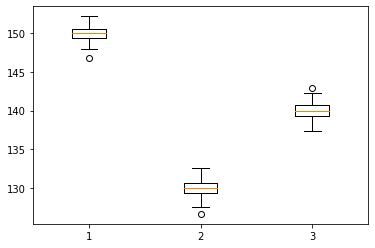

In [ ]:
plt.boxplot([box1, box2, box3])

#Histograms

A histogram is a way to show for one variable the number of times a value appears. 

The advantage is that it allows you to see the distribution of data. One important variable is bin, how many bars there are, which allows you to decide how much data is clustered. By changing the bin, we cna make the bars narrower or wider.




(array([ 3., 49., 88., 48., 12.]),
 array([119.95652783, 132.31653829, 144.67654876, 157.03655922,
        169.39656969, 181.75658015]),
 <a list of 5 Patch objects>)

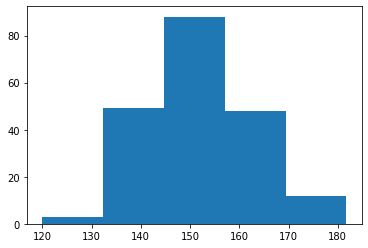

In [ ]:
array4 = np.random.normal(150, 10, 200)
array5 = np.random.normal(180, 10, 200)
plt.hist(array4, bins = 5)

(array([ 1.,  2., 21., 28., 53., 35., 38., 10., 10.,  2.]),
 array([119.95652783, 126.13653306, 132.31653829, 138.49654353,
        144.67654876, 150.85655399, 157.03655922, 163.21656446,
        169.39656969, 175.57657492, 181.75658015]),
 <a list of 10 Patch objects>)

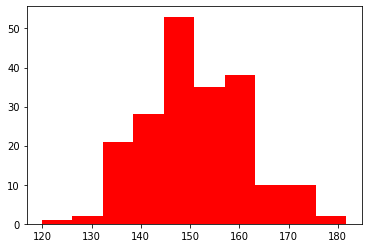

In [ ]:
plt.hist(array4, bins = 10, color = 'red')

(array([200.]),
 array([123.51766639, 173.79838611]),
 <a list of 1 Patch objects>)

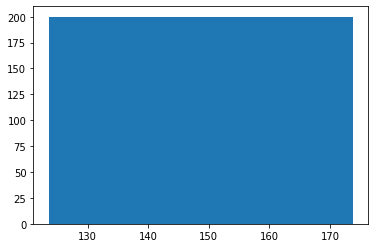

In [ ]:
plt.hist(array4, bins = 1)

#Plotting multiple histograms on one figure

(array([[10., 29., 62., 52., 34., 13.,  0.,  0.,  0.,  0.],
        [ 0.,  0.,  0.,  1., 14., 36., 72., 49., 24.,  4.]]),
 array([125.03797916, 133.14363551, 141.24929185, 149.3549482 ,
        157.46060454, 165.56626089, 173.67191723, 181.77757358,
        189.88322992, 197.98888627, 206.09454261]),
 <a list of 2 Lists of Patches objects>)

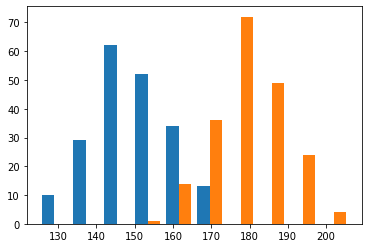

In [ ]:
plt.hist([array4,array5], bins = 10)

# Violinplot

A violin plot allows us is kind of a combination of a boxplot and histogram. It shows the min, max, median and mean as well as the density of values.

{'bodies': [<matplotlib.collections.PolyCollection at 0x7fc282198fd0>,
 'cmeans': <matplotlib.collections.LineCollection at 0x7fc282198e10>,
 'cmaxes': <matplotlib.collections.LineCollection at 0x7fc2821a5750>,
 'cmins': <matplotlib.collections.LineCollection at 0x7fc2821a5410>,
 'cbars': <matplotlib.collections.LineCollection at 0x7fc2821a5bd0>,
 'cmedians': <matplotlib.collections.LineCollection at 0x7fc2821a5fd0>}

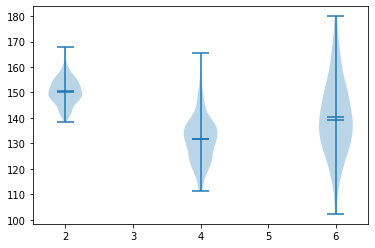

In [ ]:
box3 = np.random.normal(150, 5, 200)
box4 = np.random.normal(130, 10, 200)
box5 = np.random.normal(140, 15, 200)
plt.violinplot([box3, box4, box5], [2,4,6], showmeans = True, showmedians = True)